In [ ]:
! pip install torchmetrics

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from torchmetrics import F1Score

In [ ]:
from tensorflow.keras.datasets import mnist, fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train_upd = []

for elem in x_train:
    x_train_upd.append(elem.flatten())

x_train_upd = np.array(x_train_upd)

In [ ]:
x_test_upd = []

for elem in x_test:
    x_test_upd.append(elem.flatten())

x_test_upd = np.array(x_test_upd)

# without convolution (tensorflow)

In [ ]:
tf_model = keras.Sequential(
    [
        keras.layers.Dense(64, activation = 'relu', input_shape = (784,)),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

tf_model.compile( optimizer = keras.optimizers.Adam(), loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['Accuracy'])


In [ ]:
history = tf_model.fit(x_train_upd, y_train, epochs = 15, validation_split = 0.1, verbose = 2)
test_loss, test_accuracy = tf_model.evaluate(x_test_upd, y_test)

Epoch 1/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9689 - loss: 0.1141 - val_Accuracy: 0.9648 - val_loss: 0.1566
Epoch 2/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9692 - loss: 0.1096 - val_Accuracy: 0.9643 - val_loss: 0.1660
Epoch 3/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9701 - loss: 0.1109 - val_Accuracy: 0.9663 - val_loss: 0.1725
Epoch 4/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9707 - loss: 0.1040 - val_Accuracy: 0.9688 - val_loss: 0.1414
Epoch 5/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9727 - loss: 0.1011 - val_Accuracy: 0.9658 - val_loss: 0.1552
Epoch 6/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9732 - loss: 0.0992 - val_Accuracy: 0.9655 - val_loss: 0.1580
Epoch 7/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9734 - loss: 0.0971 - val_Accuracy: 0.9688 - val_loss: 0.1596
Epoch 8/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9741 - loss: 0.0986 - val_Accuracy: 0.9630 - val_loss: 0.1721
Epoch 9/15
1688/1688 - 2s - 1ms/step - Accuracy: 0.9743 - loss: 0.0929 - val_Accuracy: 0.9662 - 

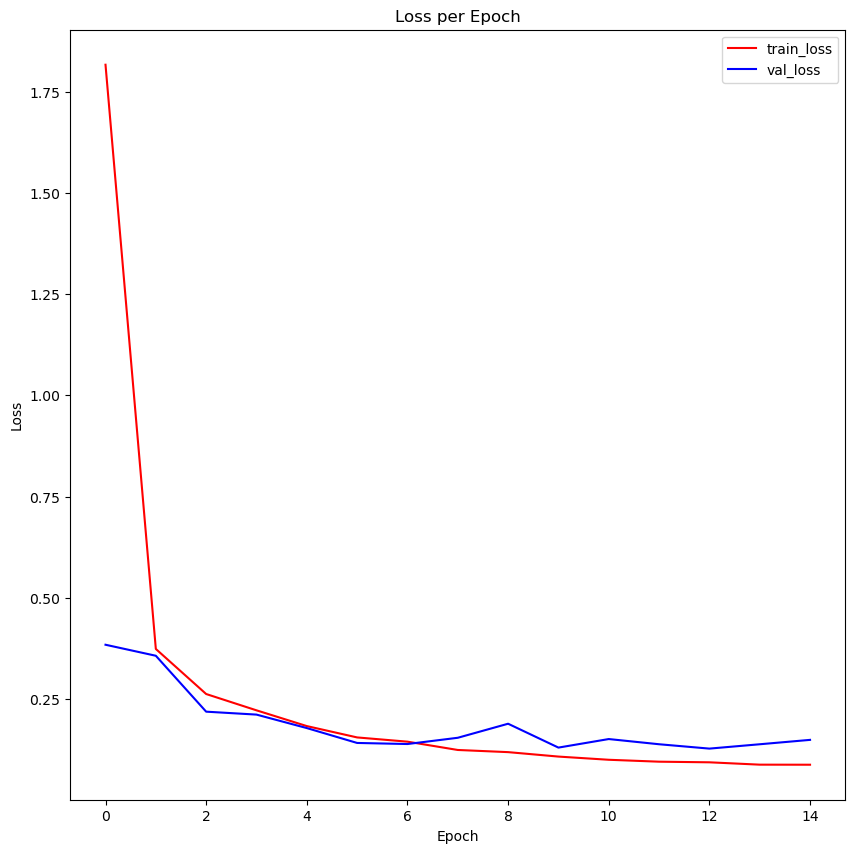

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'], label = 'train_loss', c = 'r')
plt.plot(history.history['val_loss'], label = 'val_loss', c = 'b')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

### without convolution (tensorflow) for GridSearchCV

In [ ]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model(optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(784,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [10, 50],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.01, 0.001, 0.0001],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)


grid_result = grid.fit(x_train_upd, y_train)

print("Лучшие параметры: %f с обучением (%)" % (grid_result.best_score_))
print("Лучшие параметры: ", grid_result.best_params_)

ValueError: Invalid parameter learning_rate for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(learning_rate=0.01)`
Check the list of available parameters with `estimator.get_params().keys()`

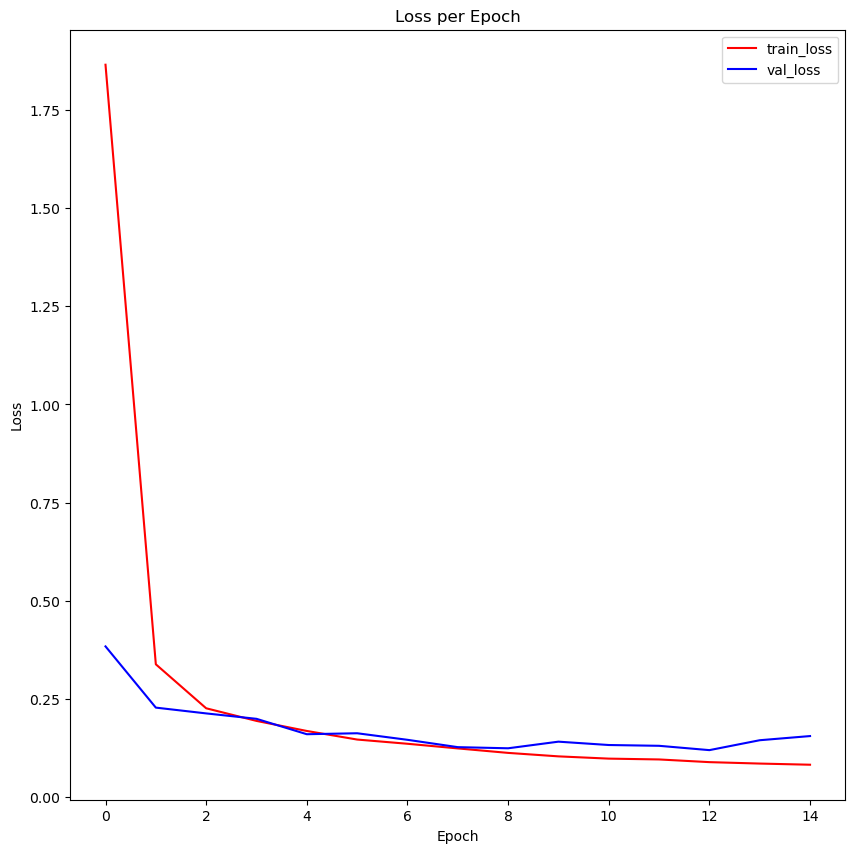

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'], label = 'train_loss', c = 'r')
plt.plot(history.history['val_loss'], label = 'val_loss', c = 'b')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

In [ ]:
y_pred = tf_model.predict(x_test_upd)

y_pred = y_pred.argmax(axis=1)


acc = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average="weighted",zero_division=1)

recall = recall_score(y_test, y_pred,average="weighted")

f1 = f1_score(y_test, y_pred, average="weighted")

print(f"accuracy: {acc}")

print(f"f1: {f1}")

print(f"recall: {recall}")

print(f"precision: {precision}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
accuracy: 0.9627
f1: 0.9627202296224002
recall: 0.9627
precision: 0.9631218250297736


Text(50.722222222222214, 0.5, 'Truth')

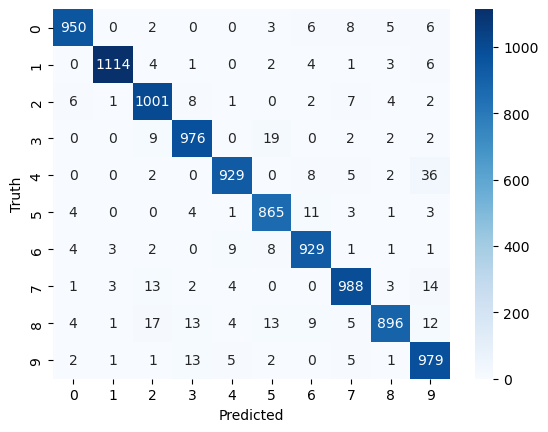

In [ ]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Truth')

# using convolution (tensorflow)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_upd = []

for elem in x_train:
    x_train_upd.append(elem.flatten())

x_train_upd = np.array(x_train_upd)

x_test_upd = []

for elem in x_test:
    x_test_upd.append(elem.flatten())

x_test_upd = np.array(x_test_upd)

In [ ]:
# Normalization to improve learning speed
x_train_upd_2 = x_train / 255
x_test_upd_2 = x_test / 255

# Adds 3rd layer. Because the pictures are grayscaled and the convolution works with 3d
x_train_upd_2 = np.expand_dims(x_train_upd_2, axis = 3)
x_test_upd_2 = np.expand_dims(x_test_upd_2, axis = 3)

# Convolution network returns prbabilities, that why we need to replace each category with binary categorical vector
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
tf_model_2 = keras.Sequential(
    [
        keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.1),
        # keras.layers.Dense(50, activation = 'relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

tf_model_2.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['Accuracy'])

In [ ]:
history = tf_model_2.fit(x_train_upd_2, y_train, epochs = 3, validation_split = 0.1, verbose = 2)
test_loss, test_accuracy = tf_model_2.evaluate(x_test_upd_2, y_test)

Epoch 1/3
1688/1688 - 29s - 17ms/step - Accuracy: 0.9494 - loss: 0.1643 - val_Accuracy: 0.9817 - val_loss: 0.0583
Epoch 2/3
1688/1688 - 27s - 16ms/step - Accuracy: 0.9827 - loss: 0.0540 - val_Accuracy: 0.9888 - val_loss: 0.0396
Epoch 3/3
1688/1688 - 26s - 16ms/step - Accuracy: 0.9877 - loss: 0.0385 - val_Accuracy: 0.9887 - val_loss: 0.0393
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - Accuracy: 0.9891 - loss: 0.0371


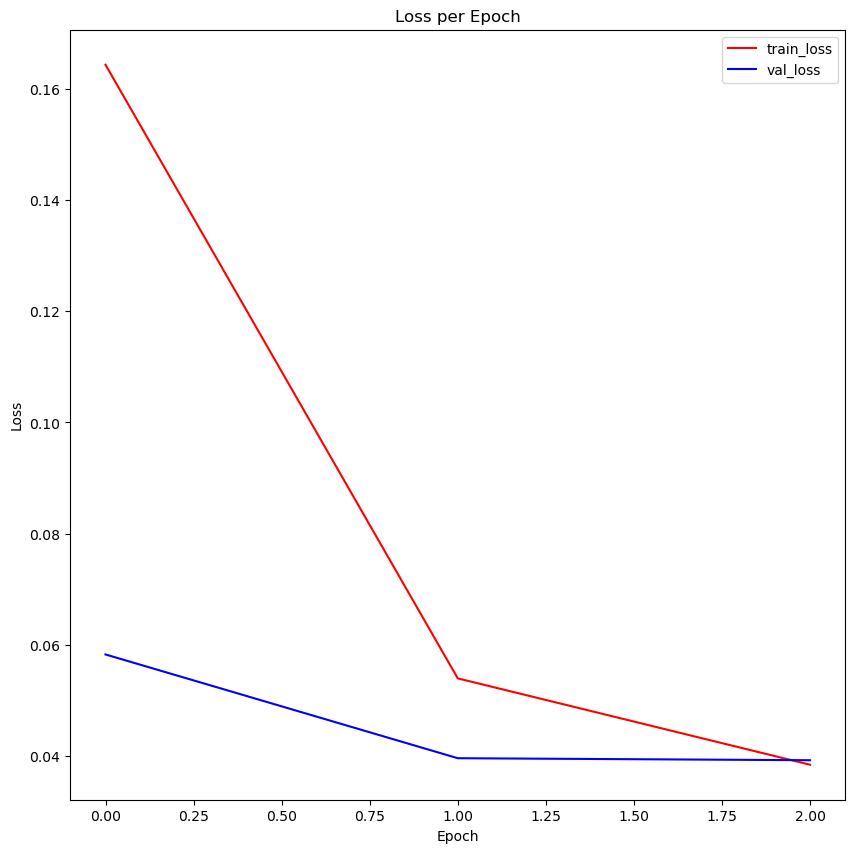

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'], label = 'train_loss', c = 'r')
plt.plot(history.history['val_loss'], label = 'val_loss', c = 'b')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

In [ ]:
y_pred = tf_model_2.predict(x_test_upd_2)
y_pred = y_pred.argmax(axis = 1)

acc = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average="weighted",zero_division=1)

recall = recall_score(y_test, y_pred,average="weighted")

f1 = f1_score(y_test, y_pred, average="weighted")

print(f"accuracy: {acc}")

print(f"f1: {f1}")

print(f"recall: {recall}")

print(f"precision: {precision}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
accuracy: 0.9913
f1: 0.9912981022729986
recall: 0.9913
precision: 0.9913426527963282


In [ ]:
# y_pred = tf_model_2.predict(x_test_upd_2)
# y_pred = y_pred.argmax(axis = 1)

# acc = accuracy_score(y_test, y_pred)

# precision = precision_score(y_test, y_pred, average="weighted",zero_division=1)

# recall = recall_score(y_test, y_pred,average="weighted")

# f1 = f1_score(y_test, y_pred, average="weighted")

# print(f"accuracy: {acc}")

# print(f"f1: {f1}")

# print(f"recall: {recall}")

# print(f"precision: {precision}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
accuracy: 0.9878
f1: 0.9877996096303426
recall: 0.9878
precision: 0.9878541140565067


3. Torch linear

In [ ]:
x_train_upd_tensor = torch.tensor(x_train_upd, dtype = torch.float32)
x_test_upd_tensor = torch.tensor(x_test_upd, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_cat, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test_cat, dtype = torch.float32)

train_data = TensorDataset(x_train_upd_tensor, y_train_tensor)
test_data = TensorDataset(x_test_upd_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [ ]:
y_test_tensor

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size = 784, hidden_size = 32, output_size = 10):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.softmax = nn.Softmax(dim = 1)
        self.layer_out = nn.Linear(hidden_size, output_size)



    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.layer_out(out)
        out = self.softmax(out)


        return out


In [ ]:
from torchmetrics import Accuracy
from torchmetrics import F1Score

In [ ]:
epochs = 30
learning_rate = 0.001
torch_model = NeuralNet()

# Loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(torch_model.parameters(), lr = learning_rate)
accuracy = Accuracy(task = 'multiclass', num_classes=10)
f1 = F1Score(task = 'multiclass', num_classes=10)

loss_batch = []
loss_epoch = []
loss_batch_val = []
loss_epoch_val = []
accuracy_batch = []
accuracy_total = []
f1_batch = []
f1_total = []

In [ ]:
for epoch in range(epochs):
    for batch, (input, output) in enumerate(train_loader):
        torch_model.train()
        optimizer.zero_grad()

        y_pred = torch_model(input)
        loss = loss_fn(y_pred, output)
        loss.backward()
        loss_batch.append(loss.detach().numpy().item())

        optimizer.step()

    loss_epoch.append(np.mean(loss_batch))

    # if epoch % 50 == 0:
    print(f'Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}')

# Eval model
    for iteration, (input, output) in enumerate(test_loader):
      torch_model.eval()
      with torch.no_grad():
          y_pred = torch_model(input)

          loss = loss_fn(y_pred, output)

          loss_batch_val.append(loss.detach().numpy().item())
          batch_accuracy = accuracy(y_pred, output)
          accuracy_batch.append(batch_accuracy.detach().numpy().item())
          batch_f1 = f1(y_pred, output)
          f1_batch.append(batch_f1.detach().numpy().item())

    loss_epoch_val.append(np.mean(loss_batch_val))
    accuracy_total.append(np.mean(accuracy_batch))
    f1_total.append(np.mean(f1_batch))


model_accuracy = accuracy_total[-1]
model_f1 = f1_total[-1]
print(f'accuracy: {model_accuracy:.2%}')
print(f'f1: {model_f1:.2f}')

Epoch 0/15, Loss: 1.6799
Epoch 1/15, Loss: 1.7112
Epoch 2/15, Loss: 1.6799
Epoch 3/15, Loss: 1.7737
Epoch 4/15, Loss: 1.6487
Epoch 5/15, Loss: 1.7112
Epoch 6/15, Loss: 1.5862
Epoch 7/15, Loss: 1.7737
Epoch 8/15, Loss: 1.6174
Epoch 9/15, Loss: 1.8987
Epoch 10/15, Loss: 1.6799
Epoch 11/15, Loss: 1.7111
Epoch 12/15, Loss: 1.7104
Epoch 13/15, Loss: 1.7112
Epoch 14/15, Loss: 1.6484
accuracy: 91.46%
f1: 0.91


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# without convolution (pytorch)

In [ ]:
from tensorflow.keras.datasets import mnist, fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

x_train_upd_2 = x_train / 255
x_test_upd_2 = x_test / 255

# Adds 3rd layer. Because the pictures are grayscaled and the convolution works with 3d
x_train_upd_2 = np.expand_dims(x_train_upd_2, axis = 3)
x_test_upd_2 = np.expand_dims(x_test_upd_2, axis = 3)


X_train = torch.tensor(x_train_upd_2, dtype=torch.float32).view(-1, 28 * 28)
X_test = torch.tensor(x_test_upd_2, dtype=torch.float32).view(-1, 28 * 28)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        # self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = torch.relu(self.fc1(x))
        # out = torch.relu(self.fc2(out))
        out = torch.softmax(self.fc3(out), dim=1)
        return out

model = NeuralNet(input_size=28 * 28, hidden_size=64, num_classes=10)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.8)

def fit(model, X, Y, batch_size=32, train=True):
    model.train(train)
    sumL, sumA, numB = 0, 0, math.ceil(len(X) / batch_size)
    list_predict = []
    for i in range(0, numB * batch_size, batch_size):
        xb = X[i:i + batch_size]
        yb = Y[i:i + batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        _, predicted = torch.max(y, 1)
        sumA += (predicted == yb).float().mean()

        list_predict.extend(predicted.detach().numpy())

    return sumL / numB, sumA / numB, list_predict

# print("before: loss: %.4f accuracy: %.4f" % fit(model, X_train, y_train, train=False))

epochs = 15
for epoch in range(epochs):
    L, A, predicted = fit(model, X_train, y_train)

    if epoch % 1 == 0 or epoch == epochs - 1:
        print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.4f}')

epoch:     1 loss: 1.6167 accuracy: 0.8597
epoch:     2 loss: 1.5299 accuracy: 0.9352
epoch:     3 loss: 1.5155 accuracy: 0.9487
epoch:     4 loss: 1.5065 accuracy: 0.9574
epoch:     5 loss: 1.5000 accuracy: 0.9636
epoch:     6 loss: 1.4957 accuracy: 0.9678
epoch:     7 loss: 1.4922 accuracy: 0.9710
epoch:     8 loss: 1.4887 accuracy: 0.9745
epoch:     9 loss: 1.4867 accuracy: 0.9762
epoch:    10 loss: 1.4848 accuracy: 0.9783
epoch:    11 loss: 1.4836 accuracy: 0.9793
epoch:    12 loss: 1.4821 accuracy: 0.9807
epoch:    13 loss: 1.4804 accuracy: 0.9822
epoch:    14 loss: 1.4799 accuracy: 0.9827
epoch:    15 loss: 1.4788 accuracy: 0.9837


In [ ]:
L, A, predicted = fit(model, X_test, y_test, train=False)
print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.8f} ')

epoch:    15 loss: 1.4901 accuracy: 0.97214454 


In [ ]:
f1 = F1Score(task="multiclass", num_classes=10)
f1_ = f1(torch.LongTensor(predicted), y_test)
f1_.item()

0.972100019454956

# using convolution (pytorch)

In [ ]:
from tensorflow.keras.datasets import mnist, fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


x_train_upd_2 = x_train / 255.0
x_test_upd_2 = x_test / 255.0


X_train = torch.tensor(x_train_upd_2, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(x_test_upd_2, dtype=torch.float32).unsqueeze(1)


In [ ]:
import math

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, num_classes, hidden_size):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 14 * 14, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.pool(out)
        out = torch.flatten(out, start_dim=1)
        out = torch.relu(self.fc1(out))
        out = torch.softmax(self.fc2(out), dim=1)
        return out

model = NeuralNet(num_classes=10, hidden_size=20)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.8)

def fit(model, X, Y, batch_size=32, train=True):
    model.train(train)
    sumL, sumA, numB = 0, 0, math.ceil(len(X) / batch_size)
    list_predict = []
    for i in range(0, numB * batch_size, batch_size):
        xb = X[i:i + batch_size]
        yb = Y[i:i + batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        _, predicted = torch.max(y, 1)
        sumA += (predicted == yb).float().mean()

        list_predict.extend(predicted.detach().numpy())

    return sumL / numB, sumA / numB, list_predict

# print("before: loss: %.4f accuracy: %.4f" % fit(model, X_train, y_train, train=False))

epochs = 15
for epoch in range(epochs):
    L, A, predicted = fit(model, X_train, y_train)

    if epoch % 1 == 0 or epoch == epochs - 1:
        print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.4f}')

epoch:     1 loss: 1.7959 accuracy: 0.6671
epoch:     2 loss: 1.7071 accuracy: 0.7536
epoch:     3 loss: 1.6222 accuracy: 0.8394
epoch:     4 loss: 1.6032 accuracy: 0.8584
epoch:     5 loss: 1.5899 accuracy: 0.8720
epoch:     6 loss: 1.5140 accuracy: 0.9495
epoch:     7 loss: 1.4881 accuracy: 0.9744
epoch:     8 loss: 1.4835 accuracy: 0.9790
epoch:     9 loss: 1.4805 accuracy: 0.9817
epoch:    10 loss: 1.4784 accuracy: 0.9837
epoch:    11 loss: 1.4768 accuracy: 0.9852
epoch:    12 loss: 1.4755 accuracy: 0.9866
epoch:    13 loss: 1.4744 accuracy: 0.9876
epoch:    14 loss: 1.4736 accuracy: 0.9883
epoch:    15 loss: 1.4727 accuracy: 0.9892


In [ ]:
L, A, predicted = fit(model, X_test, y_test, train=False)
print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.8f} ')

epoch:    15 loss: 1.4779 accuracy: 0.98362619 


In [ ]:
f1 = F1Score(task="multiclass", num_classes=10)
f1_ = f1(torch.LongTensor(predicted), y_test)
f1_.item()

0.9836000204086304

In [ ]:
!pip install torchmetrics

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from torchmetrics import F1Score

In [ ]:
f1 = F1Score(task="multiclass", num_classes=10)
f1_ = f1(torch.LongTensor(predicted), y_test)
f1_.item()

0.9825000166893005

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
(x_train2, y_train2), (x_test2, y_test2) = ((x_train, y_train)[:]), ((x_test, y_test)[:])

In [ ]:
x_train_upd2 = []

for elem in x_train2:
    x_train_upd2.append(elem.flatten())

x_train_upd2 = np.array(x_train_upd2)

x_test_upd2 = []

for elem in x_test2:
    x_test_upd2.append(elem.flatten())

x_test_upd2 = np.array(x_test_upd2)

# without convolution (tensorflow)

In [ ]:
tf_model2 = keras.Sequential(
    [
        keras.layers.Dense(128, activation = 'relu', input_shape = (784,)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

tf_model2.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['Accuracy'])


In [ ]:
history = tf_model2.fit(x_train_upd2, y_train2, epochs = 15, validation_split = 0.1, verbose = 2)
test_loss, test_accuracy = tf_model2.evaluate(x_test_upd2, y_test2)

Epoch 1/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.7839 - loss: 0.6015 - val_Accuracy: 0.8248 - val_loss: 0.5114
Epoch 2/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.7961 - loss: 0.5594 - val_Accuracy: 0.8187 - val_loss: 0.5053
Epoch 3/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8037 - loss: 0.5446 - val_Accuracy: 0.8222 - val_loss: 0.5090
Epoch 4/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8156 - loss: 0.5078 - val_Accuracy: 0.8407 - val_loss: 0.4402
Epoch 5/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8202 - loss: 0.4924 - val_Accuracy: 0.8347 - val_loss: 0.4429
Epoch 6/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8209 - loss: 0.4860 - val_Accuracy: 0.8438 - val_loss: 0.4378
Epoch 7/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8256 - loss: 0.4806 - val_Accuracy: 0.8303 - val_loss: 0.4710
Epoch 8/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8294 - loss: 0.4663 - val_Accuracy: 0.8488 - val_loss: 0.4199
Epoch 9/15
1688/1688 - 3s - 2ms/step - Accuracy: 0.8324 - loss: 0.4619 - val_Accuracy: 0.8475 - 

In [ ]:
y_pred2 = tf_model2.predict(x_test_upd2)

y_pred2 = y_pred2.argmax(axis=1)


acc = accuracy_score(y_test2, y_pred2)

precision = precision_score(y_test2, y_pred2, average="weighted",zero_division=1)

recall = recall_score(y_test2, y_pred,average="weighted")

f1 = f1_score(y_test2, y_pred2, average="weighted")

print(f"accuracy: {acc}")

print(f"f1: {f1}")

print(f"recall: {recall}")

print(f"precision: {precision}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
accuracy: 0.8538
f1: 0.8535706212242335
recall: 0.0999
precision: 0.8557442944750301


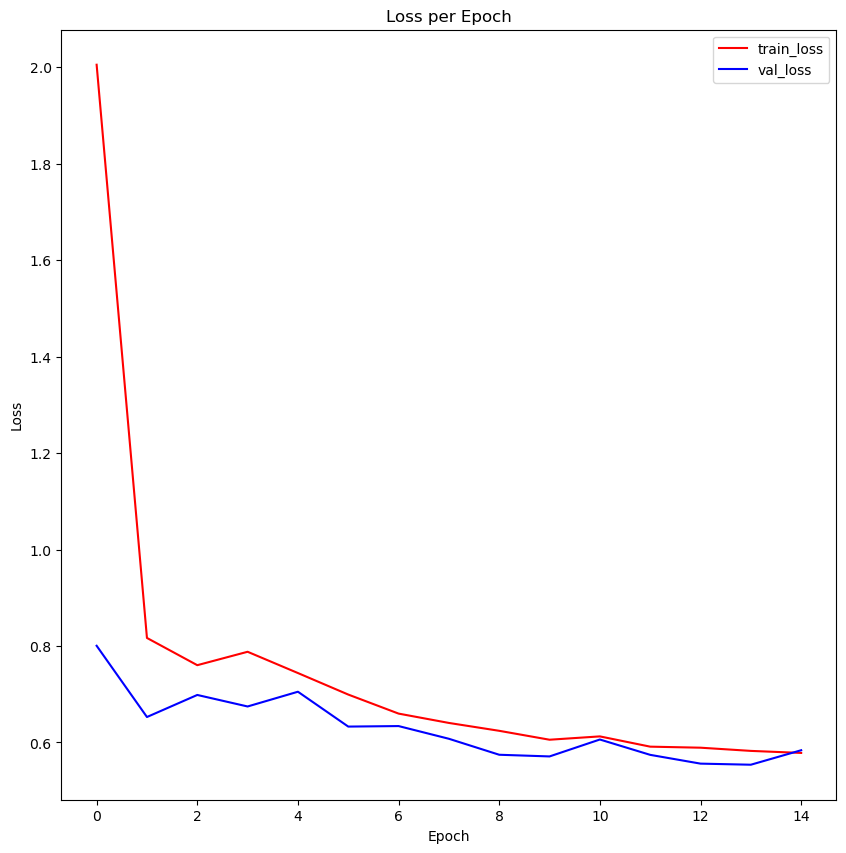

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'], label = 'train_loss', c = 'r')
plt.plot(history.history['val_loss'], label = 'val_loss', c = 'b')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

# using convolution (tensorflow)

In [ ]:
(x_train2, y_train2), (x_test2, y_test2) = ((x_train, y_train)[:]), ((x_test, y_test)[:])

# Normalization to improve learning speed
x_train_upd_2 = x_train2 / 255
x_test_upd_2 = x_test2 / 255

# Adds 3rd layer. Because the pictures are grayscaled and the convolution works with 3d
x_train_upd_2 = np.expand_dims(x_train_upd_2, axis = 3)
x_test_upd_2 = np.expand_dims(x_test_upd_2, axis = 3)

# Convolution network returns prbabilities, that why we need to replace each category with binary categorical vector
y_train_cat = keras.utils.to_categorical(y_train2, 10)
y_test_cat = keras.utils.to_categorical(y_test2, 10)

In [ ]:
tf_model_2 = keras.Sequential(
    [
        keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        # keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.1),
        # keras.layers.Dense(64, activation = 'relu'),
        # keras.layers.Dense(50, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

tf_model_2.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['Accuracy'])

C:\Users\Алёна\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = tf_model_2.fit(x_train_upd_2, y_train2, epochs = 3, validation_split = 0.1, verbose = 2)
test_loss, test_accuracy = tf_model_2.evaluate(x_test_upd_2, y_test2)

Epoch 1/3
1688/1688 - 33s - 20ms/step - Accuracy: 0.8506 - loss: 0.4163 - val_Accuracy: 0.8913 - val_loss: 0.2928
Epoch 2/3
1688/1688 - 28s - 17ms/step - Accuracy: 0.8999 - loss: 0.2756 - val_Accuracy: 0.9025 - val_loss: 0.2696
Epoch 3/3
1688/1688 - 25s - 15ms/step - Accuracy: 0.9138 - loss: 0.2310 - val_Accuracy: 0.9017 - val_loss: 0.2631
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9034 - loss: 0.2730


In [ ]:
history = tf_model_2.fit(x_train_upd_2, y_train2, epochs = 3, validation_split = 0.1, verbose = 2)
test_loss, test_accuracy = tf_model_2.evaluate(x_test_upd_2, y_test2)

Epoch 1/3
1688/1688 - 55s - 33ms/step - Accuracy: 0.9272 - loss: 0.1957 - val_Accuracy: 0.9067 - val_loss: 0.2636
Epoch 2/3
1688/1688 - 45s - 27ms/step - Accuracy: 0.9382 - loss: 0.1675 - val_Accuracy: 0.8972 - val_loss: 0.2932
Epoch 3/3
1688/1688 - 46s - 27ms/step - Accuracy: 0.9451 - loss: 0.1458 - val_Accuracy: 0.9088 - val_loss: 0.2664
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Accuracy: 0.9065 - loss: 0.2791


In [ ]:
y_pred2 = tf_model_2.predict(x_test_upd_2)

y_pred2 = y_pred2.argmax(axis=1)


acc = accuracy_score(y_test2, y_pred2)

precision = precision_score(y_test2, y_pred2, average="weighted",zero_division=1)

recall = recall_score(y_test2, y_pred,average="weighted")

f1 = f1_score(y_test2, y_pred2, average="weighted")

print(f"accuracy: {acc}")

print(f"f1: {f1}")

print(f"recall: {recall}")

print(f"precision: {precision}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
accuracy: 0.908
f1: 0.9088304615630459
recall: 0.0999
precision: 0.9122699385196414


In [ ]:
y_pred2 = tf_model_2.predict(x_test_upd_2)

y_pred2 = y_pred2.argmax(axis=1)


acc = accuracy_score(y_test2, y_pred2)

precision = precision_score(y_test2, y_pred2, average="weighted",zero_division=1)

recall = recall_score(y_test2, y_pred,average="weighted")

f1 = f1_score(y_test2, y_pred2, average="weighted")

print(f"accuracy: {acc}")

print(f"f1: {f1}")

print(f"recall: {recall}")

print(f"precision: {precision}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
accuracy: 0.9028
f1: 0.9028460973329405
recall: 0.0999
precision: 0.9046143792674222


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'Truth')

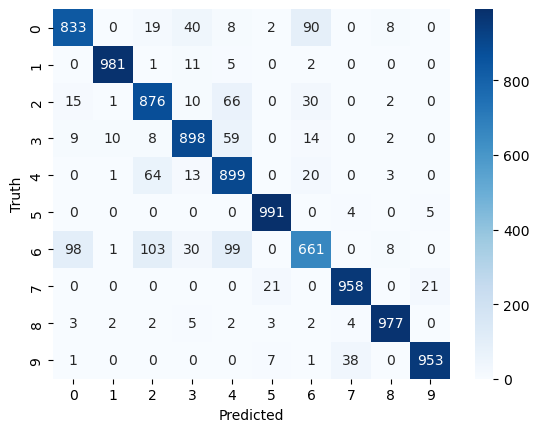

In [ ]:
cm = confusion_matrix(y_test2, y_pred2)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Truth')

# without convolution (pytorch)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [ ]:
from tensorflow.keras.datasets import mnist, fashion_mnist
(x_train2, y_train2), (x_test2, y_test2) = ((x_train, y_train)[:]), ((x_test, y_test)[:])

y_train = torch.LongTensor(y_train2)
y_test = torch.LongTensor(y_test2)

x_train_upd_2 = x_train2 / 255
x_test_upd_2 = x_test2 / 255

# Adds 3rd layer. Because the pictures are grayscaled and the convolution works with 3d
x_train_upd_2 = np.expand_dims(x_train_upd_2, axis = 3)
x_test_upd_2 = np.expand_dims(x_test_upd_2, axis = 3)


X_train = torch.tensor(x_train_upd_2, dtype=torch.float32).view(-1, 28 * 28)
X_test = torch.tensor(x_test_upd_2, dtype=torch.float32).view(-1, 28 * 28)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        # self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = torch.relu(self.fc1(x))
        # out = torch.relu(self.fc2(out))
        out = torch.softmax(self.fc3(out), dim=1)
        return out

model = NeuralNet(input_size=28 * 28, hidden_size=20, num_classes=10)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.8)

def fit(model, X, Y, batch_size=32, train=True):
    model.train(train)
    sumL, sumA, numB = 0, 0, math.ceil(len(X) / batch_size)
    list_predict = []
    for i in range(0, numB * batch_size, batch_size):
        xb = X[i:i + batch_size]
        yb = Y[i:i + batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        _, predicted = torch.max(y, 1)
        sumA += (predicted == yb).float().mean()

        list_predict.extend(predicted.detach().numpy())

    return sumL / numB, sumA / numB, list_predict

# print("before: loss: %.4f accuracy: %.4f" % fit(model, X_train, y_train, train=False))

epochs = 15
for epoch in range(epochs):
    L, A, predicted = fit(model, X_train, y_train)

    if epoch % 1 == 0 or epoch == epochs - 1:
        print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.4f}')

epoch:     1 loss: 1.7691 accuracy: 0.6976
epoch:     2 loss: 1.6502 accuracy: 0.8137
epoch:     3 loss: 1.6331 accuracy: 0.8288
epoch:     4 loss: 1.6257 accuracy: 0.8355
epoch:     5 loss: 1.6212 accuracy: 0.8401
epoch:     6 loss: 1.6183 accuracy: 0.8428
epoch:     7 loss: 1.6145 accuracy: 0.8468
epoch:     8 loss: 1.6133 accuracy: 0.8475
epoch:     9 loss: 1.6122 accuracy: 0.8487
epoch:    10 loss: 1.6104 accuracy: 0.8505
epoch:    11 loss: 1.6096 accuracy: 0.8515
epoch:    12 loss: 1.6068 accuracy: 0.8545
epoch:    13 loss: 1.6087 accuracy: 0.8520
epoch:    14 loss: 1.6042 accuracy: 0.8568
epoch:    15 loss: 1.6034 accuracy: 0.8575


In [ ]:
L, A, predicted = fit(model, X_test, y_test, train=False)
print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.8f} ')

epoch:    15 loss: 1.6268 accuracy: 0.83366615 


In [ ]:
f1 = F1Score(task="multiclass", num_classes=10)
f1_ = f1(torch.LongTensor(predicted), y_test)
f1_.item()

0.8337000012397766

# using convolution (pytorch)

In [ ]:
from tensorflow.keras.datasets import mnist, fashion_mnist
(x_train2, y_train2), (x_test2, y_test2) = ((x_train, y_train)[:]), ((x_test, y_test)[:])
y_train = torch.LongTensor(y_train2)
y_test = torch.LongTensor(y_test2)


x_train_upd_2 = x_train2 / 255.0
x_test_upd_2 = x_test2 / 255.0


X_train = torch.tensor(x_train_upd_2, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(x_test_upd_2, dtype=torch.float32).unsqueeze(1)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, num_classes, hidden_size):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.pool1(out)
        out = F.relu(self.conv2(out))
        out = self.pool2(out)
        out = torch.flatten(out, start_dim=1)
        out = torch.relu(self.fc1(out))
        out = torch.softmax(self.fc2(out), dim=1)
        return out

model = NeuralNet(num_classes=10, hidden_size=64)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

def fit(model, X, Y, batch_size=32, train=True):
    model.train(train)
    sumL, sumA, numB = 0, 0, math.ceil(len(X) / batch_size)
    list_predict = []
    for i in range(0, numB * batch_size, batch_size):
        xb = X[i:i + batch_size]
        yb = Y[i:i + batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        _, predicted = torch.max(y, 1)
        sumA += (predicted == yb).float().mean()

        list_predict.extend(predicted.detach().numpy())

    return sumL / numB, sumA / numB, list_predict

# print("before: loss: %.4f accuracy: %.4f" % fit(model, X_train, y_train, train=False))

epochs = 5
for epoch in range(epochs):
    L, A, predicted = fit(model, X_train, y_train)

    if epoch % 1 == 0 or epoch == epochs - 1:
        print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.4f}')

epoch:     1 loss: 1.8261 accuracy: 0.6531
epoch:     2 loss: 1.6814 accuracy: 0.7819
epoch:     3 loss: 1.6518 accuracy: 0.8113
epoch:     4 loss: 1.6281 accuracy: 0.8350
epoch:     5 loss: 1.6134 accuracy: 0.8493


In [ ]:
L, A, predicted = fit(model, X_test, y_test, train=False)
print(f'epoch: {epoch+1:5d} loss: {L:.4f} accuracy: {A:.8f} ')

epoch:    15 loss: 1.5960 accuracy: 0.86481631 


In [ ]:
f1 = F1Score(task="multiclass", num_classes=10)
f1_ = f1(torch.LongTensor(predicted), y_test)
f1_.item()

0.8648999929428101

In [ ]:
result = {'name':['mnist', 'fashion_mnist'],
         'tenserflow f1': [0.972, 0.853],
         'tenserflow convolution f1' : [ 0.991, 0.909],
         'pytorch f1': [0.969 ,0.834],
         'pytorch convolution f1': [0.984, 0.865]}

In [ ]:
df = pd.DataFrame(result)

In [ ]:
df = df.set_index('name')

In [ ]:
df

,tenserflow f1,tenserflow convolution f1,pytorch f1,pytorch convolution f1
name,,,,
mnist,0.972,0.991,0.969,0.984
fashion_mnist,0.853,0.909,0.834,0.865
